In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data_file5.csv')

In [3]:
df

,ID,followers_count,friends_count,listed_count,favourites_count,label
0,17461978,15349596,692,45568,142,0
1,1297437077403885568,0,44,0,7,1
2,17685258,762839,475,3201,953,0
3,15750898,327587,4801,1744,2946,0
4,1659167666,13324,647,44,729,1
...,...,...,...,...,...,...
8273,1630890068,10997,821,221,20115,0
8274,713519580757536769,44,637,0,298,1
8275,93345260,342,849,0,2464,1
8276,1749309397,72,367,2,2634,1


In [4]:
df.describe()

,ID,followers_count,friends_count,listed_count,favourites_count,label
count,8.278000e+03,8.278000e+03,8.278000e+03,8278.000000,8278.000000,8278.000000
mean,3.124649e+17,6.464586e+05,6.609915e+03,1504.488524,13297.475477,0.561247
std,4.893735e+17,4.148888e+06,6.377857e+04,9855.072510,40415.682739,0.496265
min,1.200000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,1.085977e+08,2.010000e+02,2.310000e+02,0.000000,146.000000,0.000000
50%,8.668272e+08,1.939500e+03,7.230000e+02,13.000000,1584.500000,1.000000
75%,8.185662e+17,3.762050e+04,2.124000e+03,258.000000,9121.250000,1.000000
max,1.301791e+18,1.124032e+08,4.339982e+06,550181.000000,783456.000000,1.000000


In [5]:
df2=df.drop('ID',axis=1)
#df_label = pd.DataFrame(df2.pop('label'))
df_label = df2.pop('label')

In [6]:
df2.head()

,followers_count,friends_count,listed_count,favourites_count
0,15349596,692,45568,142
1,0,44,0,7
2,762839,475,3201,953
3,327587,4801,1744,2946
4,13324,647,44,729


In [7]:
from sklearn.preprocessing import MinMaxScaler

In [8]:
scaler=MinMaxScaler()

In [9]:
scaled_data=scaler.fit_transform(df2)

In [10]:
scaled_data

array([[1.36558408e-01, 1.59447666e-04, 8.28236526e-02, 1.81248213e-04],
       [0.00000000e+00, 1.01382909e-05, 0.00000000e+00, 8.93477107e-06],
       [6.78663329e-03, 1.09447459e-04, 5.81808532e-03, 1.21640526e-03],
       ...,
       [3.04261919e-06, 1.95622931e-04, 0.00000000e+00, 3.14503942e-03],
       [6.40551409e-07, 8.45625627e-05, 3.63516734e-06, 3.36202671e-03],
       [4.55503224e-05, 8.08759115e-05, 9.45143507e-05, 1.02111669e-02]])

In [11]:
scaled_df=pd.DataFrame(scaled_data,columns=df2.columns)

In [12]:
scaled_df

,followers_count,friends_count,listed_count,favourites_count
0,1.365584e-01,0.000159,0.082824,0.000181
1,0.000000e+00,0.000010,0.000000,0.000009
2,6.786633e-03,0.000109,0.005818,0.001216
3,2.914393e-03,0.001106,0.003170,0.003760
4,1.185376e-04,0.000149,0.000080,0.000930
...,...,...,...,...
8273,9.783533e-05,0.000189,0.000402,0.025675
8274,3.914481e-07,0.000147,0.000000,0.000380
8275,3.042619e-06,0.000196,0.000000,0.003145
8276,6.405514e-07,0.000085,0.000004,0.003362


C:\Users\NAS\anaconda3\lib\site-packages\seaborn\matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


<Figure size 1080x576 with 0 Axes>

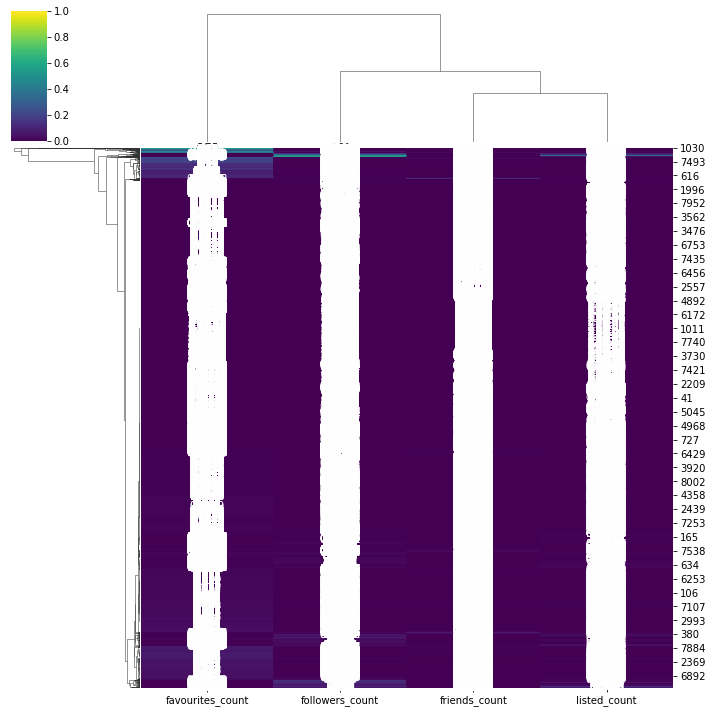

In [13]:
plt.figure(figsize=(15,8))
sns.clustermap(scaled_df,cmap='viridis',annot=True)

<AxesSubplot:>

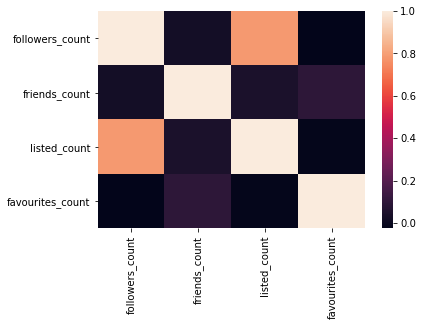

In [14]:
sns.heatmap(scaled_df.corr())

In [15]:
from sklearn.cluster import AgglomerativeClustering

In [71]:
model= AgglomerativeClustering(n_clusters=50)

In [72]:
cluster_labels=model.fit_predict(scaled_df)

In [73]:
cluster_labels

array([ 1,  9, 14, ..., 44, 44, 37], dtype=int64)

<AxesSubplot:xlabel='favourites_count', ylabel='listed_count'>

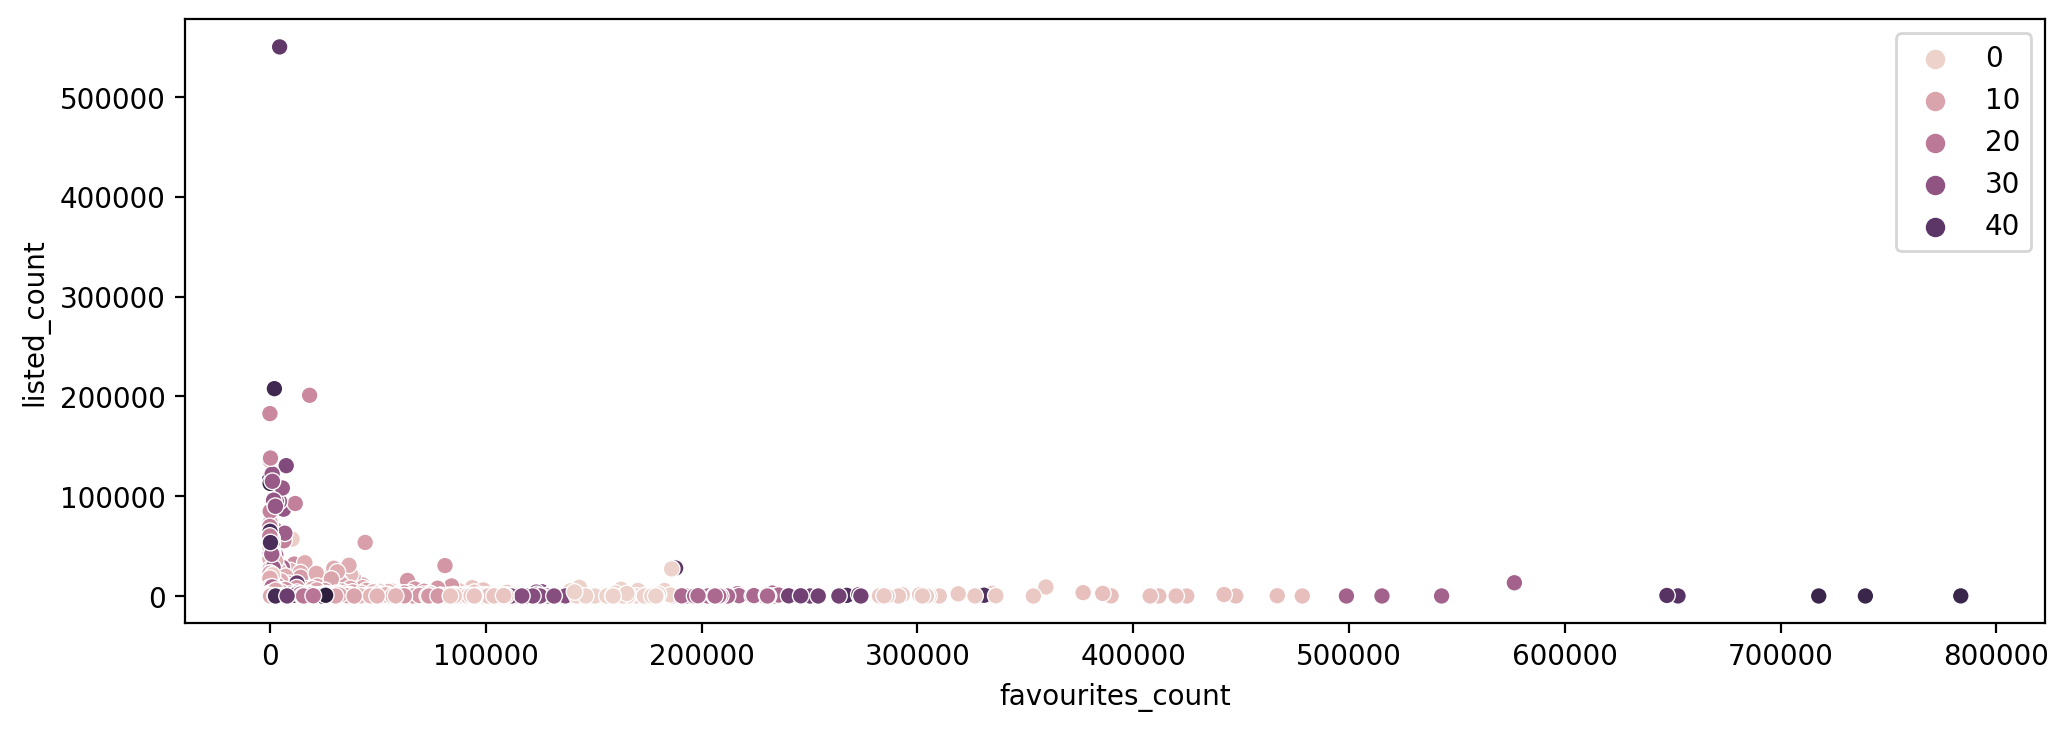

In [48]:
plt.figure(figsize=(12,4), dpi=200)
sns.scatterplot(data=df2,x='favourites_count', y='listed_count', hue=cluster_labels)

In [49]:
#max distance possible?
# sqrt(N_features)
len(scaled_df.columns)
np.sqrt(4)

2.0

In [50]:
np.sqrt(4)

2.0

In [51]:
scaled_df['favourites_count'].idxmax()

1878

In [52]:
scaled_df['favourites_count'].idxmin()

8

In [53]:
account_a=scaled_df.iloc[1878]
account_b=scaled_df.iloc[8]
print(account_a)

followers_count     0.000035
friends_count       0.000449
listed_count        0.000180
favourites_count    1.000000
Name: 1878, dtype: float64


In [54]:
distance=np.linalg.norm(account_a-account_b)

In [55]:
distance

1.000000111018997

In [78]:
model=AgglomerativeClustering(n_clusters=None,distance_threshold=1.000000111018997)

In [79]:
cluster_labels= model.fit_predict(scaled_df)

In [80]:
cluster_labels

array([ 3, 10, 10, ..., 10, 10,  0], dtype=int64)

In [81]:
df3=pd.DataFrame(cluster_labels)

In [82]:
df3

,0
0,3
1,10
2,10
3,10
4,10
...,...
8273,0
8274,10
8275,10
8276,10


In [83]:
df3.value_counts()

10    5585
0     1744
1      492
3      256
4      105
5       38
2       37
6       14
8        5
7        1
9        1
dtype: int64

In [84]:
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster import hierarchy

In [85]:
linkage_matrix=hierarchy.linkage(model.children_)

In [86]:
linkage_matrix

array([[4.05600000e+03, 6.06900000e+03, 1.41421356e+00, 2.00000000e+00],
       [7.35900000e+03, 7.45200000e+03, 1.41421356e+00, 2.00000000e+00],
       [8.18400000e+03, 8.20700000e+03, 1.41421356e+00, 2.00000000e+00],
       ...,
       [6.53000000e+03, 1.65490000e+04, 4.69886156e+02, 8.27400000e+03],
       [7.64700000e+03, 1.65500000e+04, 5.60635354e+02, 8.27500000e+03],
       [1.62430000e+04, 1.65510000e+04, 6.11007365e+02, 8.27700000e+03]])

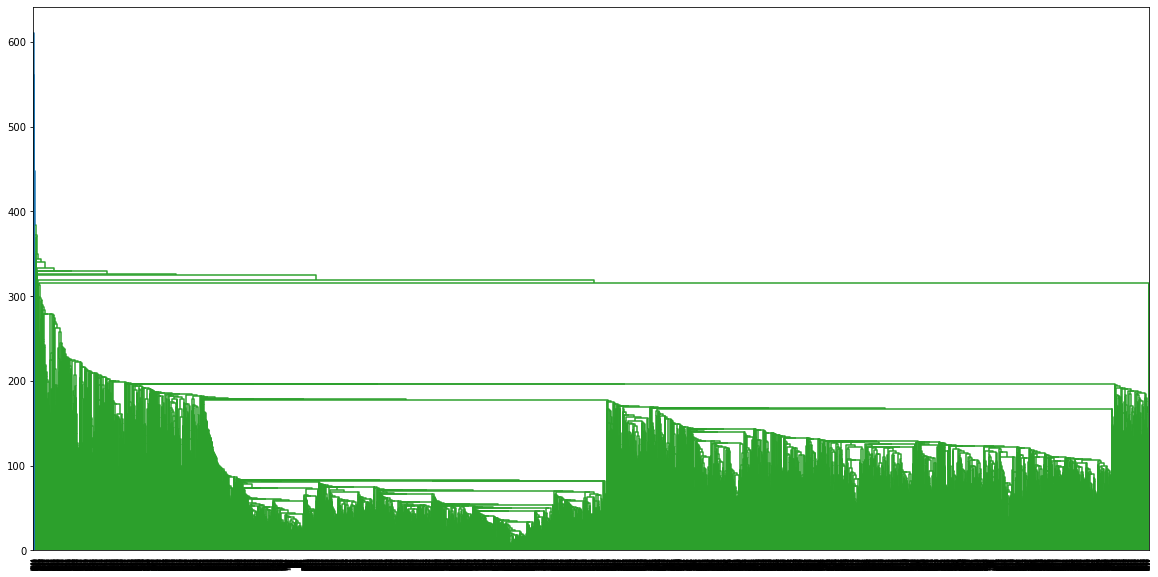

In [36]:
plt.figure(figsize=(20,10))
dendro=dendrogram(linkage_matrix,truncate_mode='lastp',p=0)

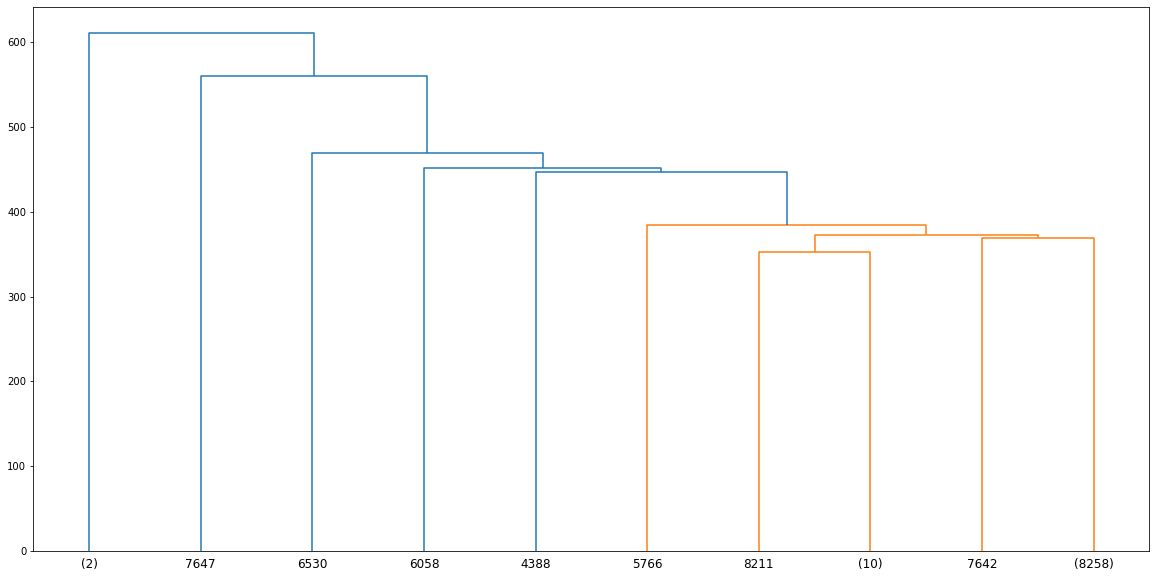

In [87]:
plt.figure(figsize=(20,10))
dendro=dendrogram(linkage_matrix,truncate_mode='lastp',p=10)

In [88]:
numberOfClusters = len(df3.value_counts())
Table = np.zeros((4,numberOfClusters))
for i in range(numberOfClusters):
    Table[0][i] = i

In [89]:
ClusteredList = df3[0].values.tolist()

In [90]:
LabelList = df_label.values.tolist()

In [91]:
for k in range(numberOfClusters):
    indices = [i for i, x in enumerate(ClusteredList) if x == k]
    Table[2][k] = len(indices)
    NumberOfBots = 0
    for item in indices:
        NumberOfBots = NumberOfBots + LabelList[item]
    Table[1][k] = NumberOfBots
    Table[3][k] = Table[1][k]/Table[2][k]


In [92]:
Table

array([[0.00000000e+00, 1.00000000e+00, 2.00000000e+00, 3.00000000e+00,
        4.00000000e+00, 5.00000000e+00, 6.00000000e+00, 7.00000000e+00,
        8.00000000e+00, 9.00000000e+00, 1.00000000e+01],
       [9.86000000e+02, 3.39000000e+02, 2.40000000e+01, 6.00000000e+00,
        7.50000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        4.00000000e+00, 0.00000000e+00, 3.21200000e+03],
       [1.74400000e+03, 4.92000000e+02, 3.70000000e+01, 2.56000000e+02,
        1.05000000e+02, 3.80000000e+01, 1.40000000e+01, 1.00000000e+00,
        5.00000000e+00, 1.00000000e+00, 5.58500000e+03],
       [5.65366972e-01, 6.89024390e-01, 6.48648649e-01, 2.34375000e-02,
        7.14285714e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        8.00000000e-01, 0.00000000e+00, 5.75111907e-01]])

In [43]:
count = 0
for i in LabelList:
    count = count + i
count

4646

In [44]:
count = 0
for i in Table[1]:
    count = count + i
count

4646.0

In [93]:
import xlsxwriter

with xlsxwriter.Workbook('ClusteringResults.xlsx') as workbook:
    worksheet = workbook.add_worksheet()

    for row_num, data in enumerate(Table):
        worksheet.write_row(row_num, 0, data)